In [1]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML

In [2]:
%matplotlib notebook

## Problem 1

Use the FuncAnimation class to animate the function $y = sin(x + \frac{t}{10})$ where $x \in [0, 2\pi]$, and t ranges from 0 to 100 seconds.

In [3]:
#set update function
def update2d(i):
    particle.set_data(x[i],y[i])
    traj.set_data(x[:i+1],y[:i+1])
    return particle,traj

In [4]:
#turn off interactive mode
plt.ioff()
#set function values
t = np.linspace(0,100,100)
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x + t/10)

#intialize figure and set up plots
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim((0, 2*np.pi))
ax.set_ylim((-1.2,1.2))
ax.set_title(r'Animation of $y=\sin(x+0.1t)$')
particle, = plt.plot([], [], marker='o', color='r')
traj, = plt.plot([], [], color='r', alpha=0.5)

#call animation function                  
ani = animation.FuncAnimation(fig, update2d, frames=range(100), interval=25)
#inped html video
HTML(ani.to_html5_video())

## Problem 2

The orbits for Mercury, Venus, Earth, and Mars are stored in the file `orbits.npz`. The file contains four NumPy arrays: `mercury`, `venus`, `earth`, and `mars`. The first column of each array contains the x-coordinates, the second column contains the y-coordinates, and the third column contians the z-coordinates, all relative to the Sun, and expressed in AU (astronomical units, the average distance between Earth and the Sun, approximately 150 million
kilometers).

Use `np.load('orbits.npz')` to load the data for the four planets' orbits. Create a 3D plot of the orbits, and compare your results with Figure 1.1.

<IPython.core.display.Javascript object>


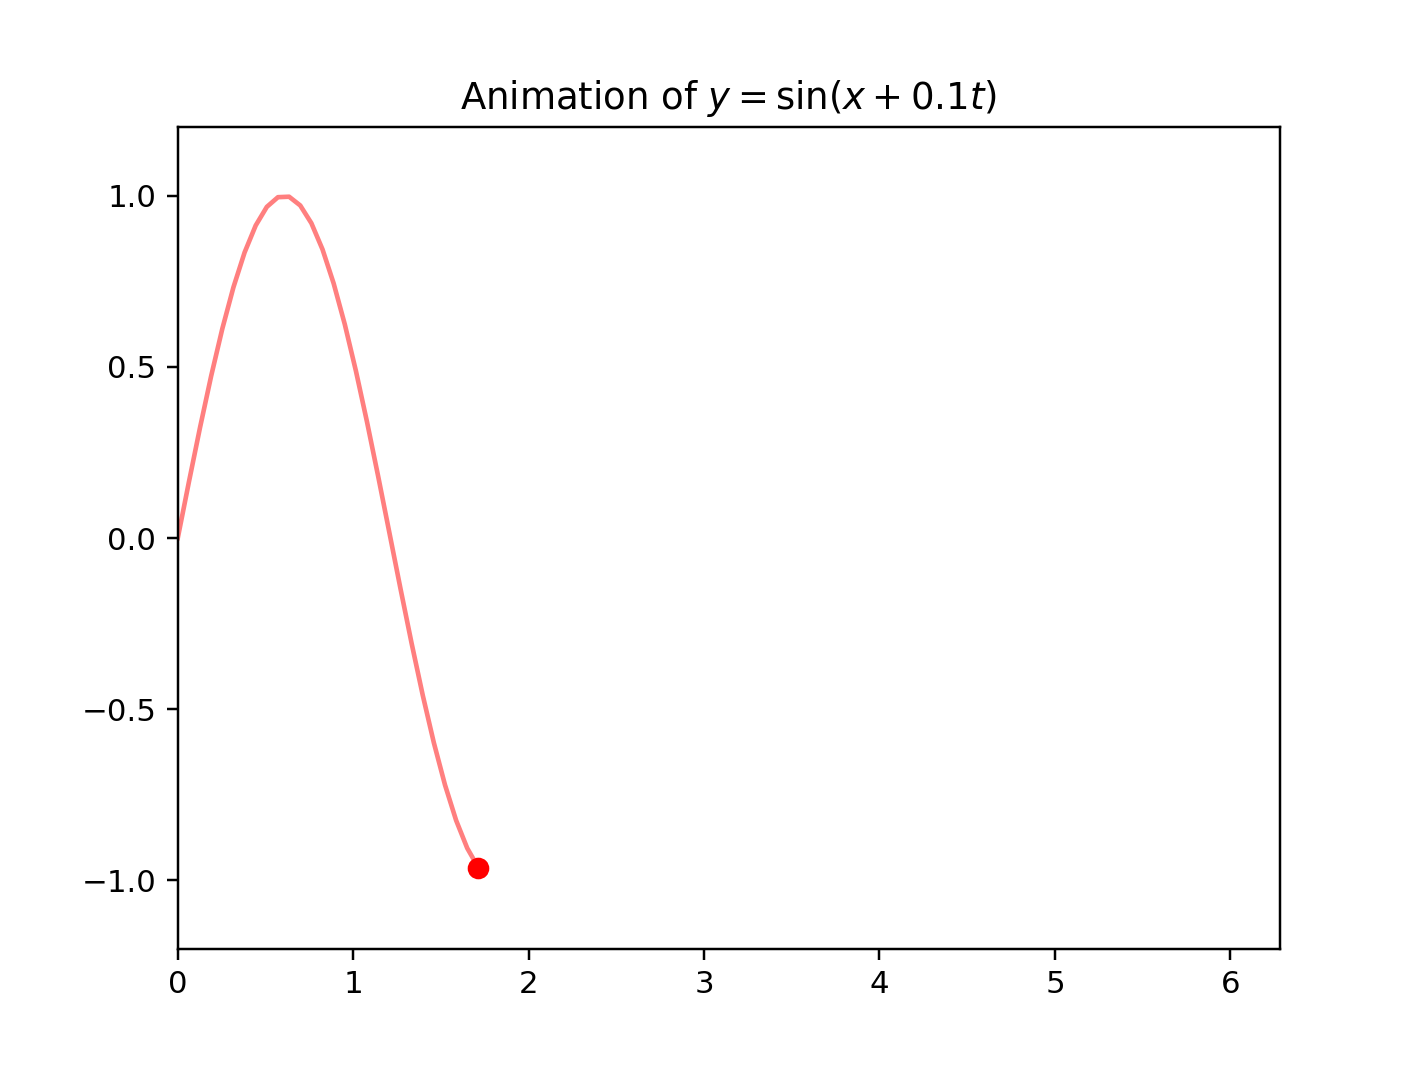

<IPython.core.display.Javascript object>


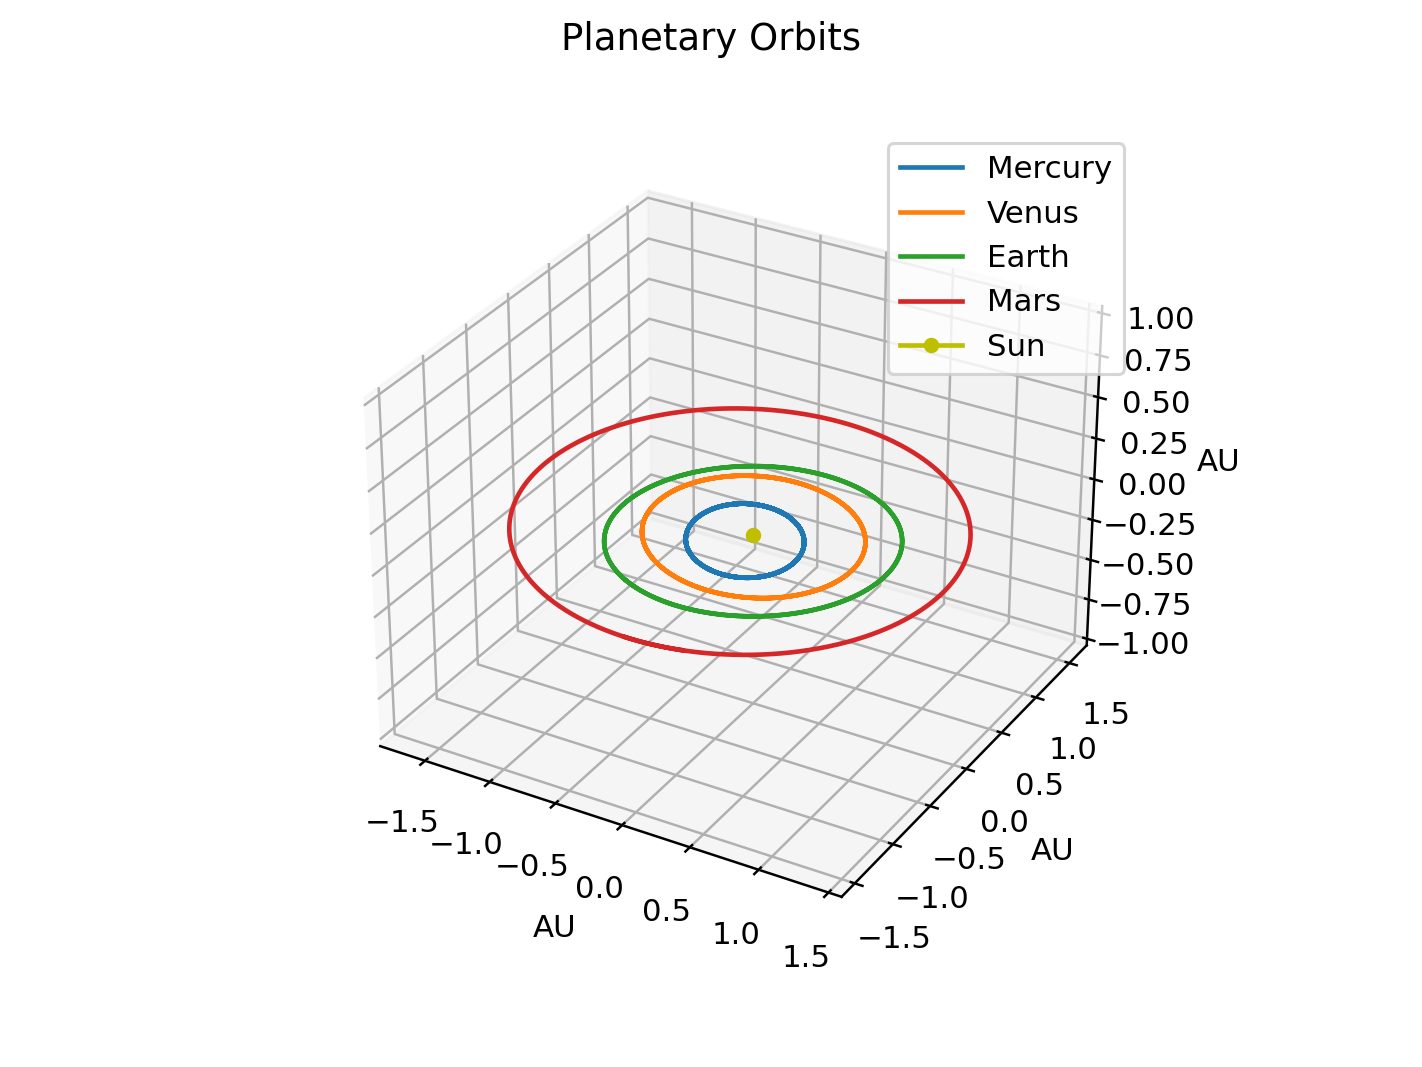

In [5]:
#load in data
orbits = np.load('orbits.npz')
mercury = orbits['mercury']
venus = orbits['venus']
earth = orbits['earth']
mars = orbits['mars']
#set up figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_zlim([-1, 1])
#plot planets
ax.plot(mercury[:, 0], mercury[:, 1], mercury[:, 2], label='Mercury')
ax.plot(venus[:, 0], venus[:, 1], venus[:, 2], label='Venus')
ax.plot(earth[:, 0], earth[:, 1], earth[:, 2], label='Earth')
ax.plot(mars[:, 0], mars[:, 1], mars[:, 2], label='Mars')
#add in the sun
ax.plot([0], [0], [0], label='Sun', marker='o', markersize=4, color='y')
#set labels
ax.set_xlabel('AU')
ax.set_ylabel('AU')
ax.set_zlabel('AU')
fig.suptitle('Planetary Orbits')
plt.legend(loc='best')
#show plot
plt.show()

## Problem 3

Each row of the arrays in `orbits.npz` gives the position of the planets at a
particular time. The arrays have 1400 points in time over a 700 day period (beginning on 2018-5-30). Create a 3D animation of the planet orbits. Display lines for the trajectories of the orbits and points for the current positions of the planets at each point in time. Your update() function will need to return a list of `Line3D` objects, one for each orbit trajectory and one for each planet position marker. Using `animation.save()`, save your animated plot as "planet_ani.mp4". Embed you anumated plot.

In [8]:
#set update function for 3d animation
def update3d(i):
    #set data for mercury
    merc.set_data(mercury[i, 0], mercury[i, 1])
    merc.set_3d_properties(mercury[i, 2])
    merc_traj.set_data(mercury[:i+1, 0], mercury[:i+1, 1])
    merc_traj.set_3d_properties(mercury[:i+1, 2])
    
    #set data for venus
    ven.set_data(venus[i, 0], venus[i, 1])
    ven.set_3d_properties(venus[i, 2])
    ven_traj.set_data(venus[:i+1, 0], venus[:i+1, 1])
    ven_traj.set_3d_properties(venus[:i+1, 2])
    
    #set data for earth
    ear.set_data(earth[i, 0], earth[i, 1])
    ear.set_3d_properties(earth[i, 2])
    ear_traj.set_data(earth[:i+1, 0], earth[:i+1, 1])
    ear_traj.set_3d_properties(earth[:i+1, 2])
    
    #set data for mars
    mar.set_data(mars[i, 0], mars[i, 1])
    mar.set_3d_properties(mars[i, 2])
    mar_traj.set_data(mars[:i+1, 0], mars[:i+1, 1])
    mar_traj.set_3d_properties(mars[:i+1, 2])
    return

In [9]:
#import data
orbits = np.load('orbits.npz')

mercury = orbits['mercury']
venus = orbits['venus']
earth = orbits['earth']
mars = orbits['mars']
#set animation settings
animation.writer = animation.writers['ffmpeg']
plt.ioff()

#create figure and set limits
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
fig.suptitle('Planetary Orbits Animation')
ax.set_zlim([-1, 1])
ax.set_ylim([-1.5, 1.5])
ax.set_xlim([-1.5, 1.5])
ax.set_xlabel('AU')
ax.set_ylabel('AU')
ax.set_zlabel('AU')

#set planet and trajectories
#mercury
merc, = ax.plot([], [], [], marker='o', color='r', label='Mercury')
merc_traj, = ax.plot([], [], color='r', alpha=0.5)
#venus
ven, = ax.plot([], [], [], marker='o', color='g', label='Venus')
ven_traj, = ax.plot([], [], [],color='g', alpha=0.5)
#earth
ear, = ax.plot([], [], [], marker='o', color='b', label='Earth')
ear_traj, = ax.plot([], [], [],color='b', alpha=0.5)
#mars
mar, = ax.plot([], [], [], marker='o', color='c', label='Mars')
mar_traj, = ax.plot([], [], [], color='c', alpha=0.5)
ax.plot([0], [0], [0], color='y', markersize=4, marker='o', label='Sun')
ax.legend(loc='upper right')

#create and save animation
ani = animation.FuncAnimation(fig, update3d, frames=range(1400), interval=20)
ani.save('planet_ani.mp4')

TypeError: object of type 'numpy.float64' has no len()

<video src="planet_ani.mp4" controls>

## Problem 4

Make a surface plot of the bivariate normal density function given by:

$$f(\mathbf{x}) = \frac{1}{\sqrt{det(2\pi\Sigma)}}exp[-\frac{1}{2}(\mathbf{x}-\mathbf{\mu})^{T}\Sigma^{-1}(\mathbf{x}-\mathbf{\mu})]$$

Where $\mathbf{x} = [x,y]^T \in \mathbb{R}^2$, $\mathbf{\mu} = [0,0]^T$ is the mean vector, and: $$\Sigma = \begin{bmatrix} 1 & 3/5 \\ 3/5 & 2 \end{bmatrix}$$ is the covariance matrix.

In [ ]:
#set x and y values
x, y = np.linspace(-4, 4, 200), np.linspace(-4, 4, 200)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)

#define function
def f(x, y):
    arr = np.array([x, y])
    Sigma = np.array([[1, 3/5.], 
                      [3/5., 2]])
    
    return 1/np.sqrt(la.det(2*np.pi*Sigma))*np.exp(-0.5*np.inner(arr, (la.inv(Sigma) @ arr)))

#call function to create Z valeus
for i in range(X.shape[0]):
    for j in range(X.shape[-1]):
        Z[i, j] = f(X[i, j], Y[i, j]) 

#define figure        
fig = plt.figure(figsize = (6, 4))
ax = fig.add_subplot(111, projection='3d')

#plot
ax.plot_surface(X, Y, Z, cmap='plasma')
plt.show()

## Problem 5

Use the data in vibration.npz to produce a surface animation of the solution
to the wave equation for an elastic rectangular membrane. The file contains three NumPy arrays: `X`, `Y`, `Z`. `X` and `Y` are meshgrids of shape `(300,200)` corresponding to 300 points in
the y-direction and 200 points in the x-direction, all corresponding to a 2x3 rectangle with one corner at the origin. `Z` is of shape `(150,300,200)`, giving the height of the vibrating membrane at each (x,y) point for 150 values of time. In the language of partial differential equations, this is the solution to the following intital/boundary value problem for the wave equation:

$$u_{tt} = 6^2(u_{xx}+u_{yy})$$
$$(x,y) \in [0,2]\times[0,3],t \in [0,5]$$
$$u(t,0,y)=u(t,2,y)=u(t,x,0)=u(t,x,3) = 0$$
$$u(0,x,y) = xy(2-x)(3-y)$$

Load the data with `np.load('vibration.npz')`. Create a 3D surface animation of the vibrating membrane. Save the animation as `vibration.mp4`.

In [ ]:
#define update function
def update_vib(i):
    ax.clear()
    ax.set_zlim([-4, 4])
    ax.set_xlim([-4, 4])
    ax.set_ylim([-4, 4])
    plot = ax.plot_surface(X, Y, Z[i], cmap='plasma')
    return plot,

In [ ]:
#load in data
X = np.load('vibration.npz')['X']
Y = np.load('vibration.npz')['Y']
Z = np.load('vibration.npz')['Z']

#set animation settings
animation.writer = animation.writers['ffmpeg']
plt.ioff()

#define figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
fig.suptitle('Vibration of Elastic Rectangular Membrane')

#create animation and save animation
ani = animation.FuncAnimation(fig, update_vib, frames=range(150), interval=100)
ani.save('vibration.mp4')

<video src="vibration.mp4" controls>